In [10]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [11]:
cash_outlet = pd.read_csv('training.csv')

In [12]:
cash_outlet.head()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,5086,98,2,3,1,1,2,2,0,0,...,-1,4,4,-4.460442,29.811396,0,0,0,0,0
1,1258,40,1,1,3,5,1,1,1,0,...,4,1,4,-6.176438,39.244871,1,1,1,0,3
2,331,18,2,4,6,3,2,1,0,0,...,-1,1,1,-6.825702,37.652798,1,0,0,0,2
3,6729,50,1,1,3,1,1,1,0,0,...,-1,1,4,-3.372049,35.808307,1,0,1,0,3
4,8671,34,1,1,1,1,2,1,0,1,...,-1,1,4,-7.179645,31.039095,1,1,0,1,3


In [13]:
cash_outlet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7094 entries, 0 to 7093
Data columns (total 37 columns):
ID                             7094 non-null int64
Q1                             7094 non-null int64
Q2                             7094 non-null int64
Q3                             7094 non-null int64
Q4                             7094 non-null int64
Q5                             7094 non-null int64
Q6                             7094 non-null int64
Q7                             7094 non-null int64
Q8_1                           7094 non-null int64
Q8_2                           7094 non-null int64
Q8_3                           7094 non-null int64
Q8_4                           7094 non-null int64
Q8_5                           7094 non-null int64
Q8_6                           7094 non-null int64
Q8_7                           7094 non-null int64
Q8_8                           7094 non-null int64
Q8_9                           7094 non-null int64
Q8_10                     

In [14]:
cash_outlet.isnull()

,ID,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8_1,Q8_2,...,Q17,Q18,Q19,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7089,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7090,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7091,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7092,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [15]:
cash_outlet.rename(inplace=True, columns={
    'Q1':'age',
    'Q2':'gender',
    'Q3':'marital status',
    'Q4':'Highest level of education',
    'Q5':'property ownership',
    'Q6':'land ownership',
    'Q7':'personal mobile status',
    'Q8_1':'salaries or wages',
    'Q8_2':'money trading or selling',
    'Q8_3':'money providing a service',
    'Q8_4':'money casual work',
    'Q8_5':'money rental income',
    'Q8_6':'money interests',
    'Q8_7':'money pension',
    'Q8_8':'money social welfare',
    'Q8_9':'money financially dependant',
    'Q8_10':'money no income',
    'Q9':'salary and wages',
    'Q10':'selling things',
    'Q11':'providing a service',
    'Q12':'send money to another country',
    'Q13':'money last sent',
    'Q14':'received money from another country',
    'Q15':'last money received',
    'Q16':'mobile money purchases',
    'Q17':'mobile money bills',
    'Q18':'literacy in kwiswhahili',
    'Q19':'literacy in english'
    
})

In [16]:
cash_outlet.describe()

,ID,age,gender,marital status,Highest level of education,property ownership,land ownership,personal mobile status,salaries or wages,money trading or selling,...,mobile money bills,literacy in kwiswhahili,literacy in english,Latitude,Longitude,mobile_money,savings,borrowing,insurance,mobile_money_classification
count,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,...,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000,7094.000000
mean,4742.627291,38.239498,1.559910,1.787426,3.060051,2.548915,1.840569,1.397942,0.062165,0.630110,...,-0.431914,1.860164,3.163378,-6.034378,35.354029,0.553989,0.461517,0.432901,0.151255,1.799267
std,2731.120086,16.332148,0.496433,1.165160,1.557779,1.534257,0.366103,0.489508,0.241472,0.482809,...,1.489879,1.351372,1.317691,2.720888,2.899511,0.497112,0.498552,0.495512,0.358322,1.196955
min,1.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,1.000000,-11.467463,29.639578,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2397.250000,25.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,0.000000,0.000000,...,-1.000000,1.000000,2.000000,-8.275387,32.935429,0.000000,0.000000,0.000000,0.000000,1.000000
50%,4744.500000,35.000000,2.000000,1.000000,3.000000,3.000000,2.000000,1.000000,0.000000,1.000000,...,-1.000000,1.000000,4.000000,-6.087854,35.073326,1.000000,0.000000,0.000000,0.000000,2.000000
75%,7105.000000,48.000000,2.000000,3.000000,3.000000,4.000000,2.000000,2.000000,0.000000,1.000000,...,-1.000000,4.000000,4.000000,-3.517053,38.351815,1.000000,1.000000,1.000000,0.000000,3.000000
max,9459.000000,100.000000,2.000000,4.000000,8.000000,6.000000,2.000000,2.000000,1.000000,1.000000,...,5.000000,5.000000,5.000000,-1.084000,40.258744,1.000000,1.000000,1.000000,1.000000,3.000000


In [17]:
cash_outlet.isnull().values.any()

False

In [18]:
cash_outlet[['gender', 'mobile_money_classification']]


,gender,mobile_money_classification
0,2,0
1,1,3
2,2,2
3,1,3
4,1,3
...,...,...
7089,2,1
7090,1,3
7091,2,0
7092,2,3


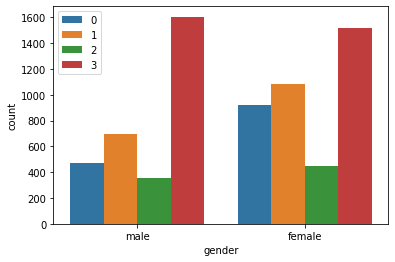

In [19]:

sns.countplot(x = 'gender', hue = 'mobile_money_classification',data = cash_outlet)
plt.legend(loc = 'best')
plt.xticks(np.arange(2), ['male', 'female'])
plt.show()

In [ ]:
sns.set(cash_outlet.set_index('mobile_money_classification').T.plot(kind='bar', stacked=True))
plt.hist('age', bins = 10)
plt.show()

In [ ]:
sns.countplot(x = 'Q2', hue = 'mobile_money_classification',data = cash_outlet)
plt.legend(loc = 'best')
plt.xticks(np.arange(2), ['male', 'female'])
plt.show()

In [ ]:

sns.catplot(x='mobile_money_classification', col='Q2', kind='count', data=cash_outlet)

In [ ]:
cash_outlet[['Q1', 'mobile_money_classification']]

In [ ]:
cash_outlet.mobile_money_classification.describe()

In [ ]:
non_mobile = cash_outlet[(cash_outlet.mobile_money_classification == 0) | (cash_outlet.mobile_money_classification == 1)]
mobile_money = cash_outlet[(cash_outlet.mobile_money_classification == 2) | (cash_outlet.mobile_money_classification == 3)]


plt.hist(cash_outlet[['mobile_money_classification', 'Q1']], bins=5)

In [ ]:
non_mobile = cash_outlet[(cash_outlet.mobile_money_classification == 0) | (cash_outlet.mobile_money_classification == 1)]
mobile_money = cash_outlet[(cash_outlet.mobile_money_classification == 2) | (cash_outlet.mobile_money_classification == 3)]
x = [cash_outlet.Q3]
plt.style.use('ggplot')
plt.hist(x, bins=10)